In [1]:
import numpy as np
import ugradio
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
sun = np.load('Sun2019final.npz')
t_start = sun['time'][0]
print t_start #Unix time that observation began (seconds)

1552848061.477029


## Plotting Raw Data

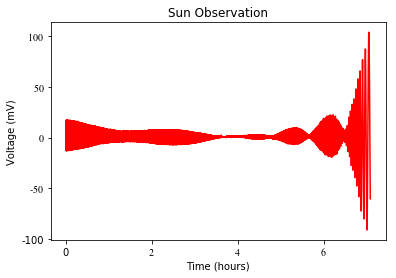

In [3]:
plt.plot((sun['time']-sun['time'][0])/3600, sun['volts']*1e4, 'r')

plt.title('Sun Observation')
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (mV)')

plt.rc('font', size=14)
plt.rc('axes', titlesize=18)
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=True)

plt.savefig('Sun.png', bbox_inches='tight')
plt.show()

## Plot Power Spectrum

/home/srstroud/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


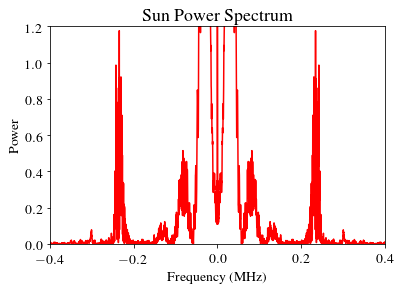

In [4]:
Vsun = np.fft.fft(sun['volts'])
Psun = np.abs(Vsun)**2
Psun = np.fft.fftshift(Psun)
Freq_Psun = np.fft.fftfreq(len(Psun), 1/6.25)
Freq_Psun = np.fft.fftshift(Freq_Psun)

plt.plot(Freq_Psun, Psun, 'r')
#%matplotlib notebook

plt.title('Sun Power Spectrum')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')

plt.xlim(-0.4, 0.4)
plt.ylim(0, 1.2)

plt.show()

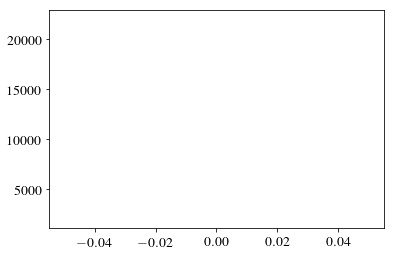

In [5]:
filt = np.where(sun['volts'] == 0)

plt.plot(filt, 'r')

plt.show()


## Hour Angle

In [16]:
time = sun['time']
tstart = time[0]
tend = time[-1] #equal to time[23457]

def LHA(a): 
    """ Inputs a Unix time array and 
        outputs an hour angle array. """ 
    HAs = []   #hard part I
    for i in range (0, len(a)):
        jul = ugradio.timing.julian_date(a[i])
        lst = ugradio.timing.lst(jul)
        RA = ugradio.coord.sunpos(jul)[0]
        HA = lst - RA + 360
        HAs.append(HA) #hard part II 
    return HAs

np.save('SunHA', LHA(time))

In [28]:
ha = np.load('SunHA.npy')
print ha

[8.9168516  8.9169131  8.91697545 ... 4.22459701 4.2246596  4.22472172]


In [7]:
#bess3 = np.array([3.83171, 7.01559, 10.1735])
#bess6 = np.array([3.83171, 7.01559, 10.1735, 13.3237, 16.4706, 19.6159])
